In [95]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import asyncio
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [96]:

api = wandb.Api()
entity, project = "ajzero", "AlphaZero"
tags = ['2024-04-12-13-38-22']
filters = {"tags": {"$in": tags}}
runs = api.runs(entity + "/" + project, filters=filters)
runs

<Runs ajzero/AlphaZero>

In [97]:
# crete a dataframe from runs and summary metrics
# async def add_max_to_summary(run):
#     try:
#         history: pd.DataFrame = run.history()
#         # get the row with the highest Self_Play/Mean_Reward
#         metric = "Self_Play/Mean_Reward"
#         best_row = history.loc[history[metric].idxmax()]
#         run.summary[f'max_{metric}'] = best_row[metric]
#         run.summary[f'max_{metric}_step'] = best_row['_step']
#         run.summary.update()
#     except:
#         pass



# async def get_history(run):
#     return await run.history()

# tasks = []
# for run in runs:
#     if run.state != "finished":
#         continue
#     tasks.append(add_max_to_summary(run))

# await asyncio.gather(*tasks)


data = []
for run in tqdm(runs):
    history: pd.DataFrame = run.history()
    for i, row in history.iterrows():
        # add a row to the data with run.config and the history row merged
        data.append({**run.config, **row})

df = pd.DataFrame(data)

df


100%|██████████| 45/45 [00:24<00:00,  1.83it/s]


,ncols,layers,puct_c,workers,lr_gamma,dir_alpha,eval_temp,env_params,eval_param,hidden_dim,...,Self_Play/Returns,Self_Play/EMA_Discounted_Return,Training/Learning_Rate,Self_Play/Mean_Timesteps,Self_Play/Mean_Entropy,Training/Value_and_Policy_loss,Self_Play/Entropies,grad_steps,Self_Play/Total_Timesteps,Evaluation/Timesteps
0,12,5,1,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,"{'values': [5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",-99.333336,0.001,99.333333,0.920932,1.117434,"{'bins': [0.8613724708557129, 0.86276870965957...",0.0,596.0,"{'values': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
1,12,5,1,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,"{'_type': 'histogram', 'packedBins': {'min': -...",-99.533335,0.001,100.000000,0.927274,1.113580,"{'_type': 'histogram', 'bins': [0.914522111415...",4.0,600.0,NaN
2,12,5,1,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,"{'packedBins': {'min': -100.5, 'size': 0.01562...",-99.673335,0.001,100.000000,0.919864,1.107310,"{'_type': 'histogram', 'bins': [0.900813043117...",8.0,600.0,NaN
3,12,5,1,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,"{'_type': 'histogram', 'packedBins': {'count':...",-99.771334,0.001,100.000000,0.920863,1.103958,"{'_type': 'histogram', 'bins': [0.891103208065...",12.0,600.0,NaN
4,12,5,1,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,"{'values': [3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0...",-94.689935,0.001,82.833333,0.916179,1.098092,"{'_type': 'histogram', 'bins': [0.869098961353...",16.0,497.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,12,5,1,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",-23.214249,0.001,23.500000,0.499265,0.693804,"{'bins': [0.4647330641746521, 0.46611768007278...",104.0,141.0,None
1391,12,5,1,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,"{'_type': 'histogram', 'values': [3, 0, 0, 0, ...",-21.549974,0.001,17.666667,0.387477,0.765096,"{'packedBins': {'min': 0.3252524435520172, 'si...",108.0,106.0,None
1392,12,5,1,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",-20.334982,0.001,17.500000,0.311422,0.831864,"{'packedBins': {'min': 0.21570417284965515, 's...",112.0,105.0,None
1393,12,5,1,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",-19.734487,0.001,18.333333,0.338799,0.823494,"{'packedBins': {'min': 0.26374465227127075, 's...",116.0,110.0,None


In [98]:
df.columns

Index(['ncols', 'layers', 'puct_c', 'workers', 'lr_gamma', 'dir_alpha',
       'eval_temp', 'env_params', 'eval_param', 'hidden_dim', 'iterations',
       'model_type', 'norm_layer', 'dir_epsilon', 'worst_value',
       'activation_fn', 'learning_rate', 'optimal_value', 'discount_factor',
       'env_description', 'planning_budget', 'training_epochs',
       'use_visit_count', 'n_steps_learning', 'selection_policy',
       'tree_temperature', 'value_loss_weight', 'max_episode_length',
       'policy_loss_weight', 'sample_batch_ratio', 'tree_value_transform',
       'observation_embedding', 'regularization_weight',
       'root_selection_policy', 'episodes_per_iteration',
       'tree_evaluation_policy', 'replay_buffer_multiplier',
       'selection_value_transform', 'Training/Replay_Buffer_Size',
       'Training/Value_loss', 'Self_Play/Min_Timesteps', '_timestamp',
       'Self_Play/Mean_Discounted_Return', 'Self_Play/Min_Return',
       'Training/Policy_loss', 'Evaluation/Returns', '

In [99]:
save_folder = 'outfiles'


def name_fn(name):
    # remove "Self_Play/" prefix if it exists
    if name.startswith("Self_Play/"):
        name = name[len("Self_Play/"):]

    # replace slash with underscore
    name = name.replace("/", "_")

    # change underscore to space
    name = name.replace("_", " ")
    return name

In [100]:
episode_max = df['episodes'].max()
# if episodes is Nan, set it to episode_max
df['episodes'] = df['episodes'].fillna(episode_max)

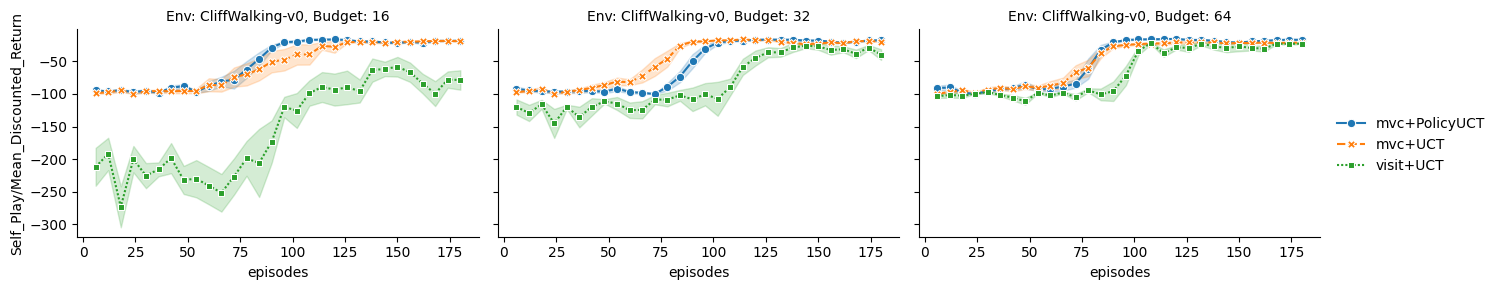

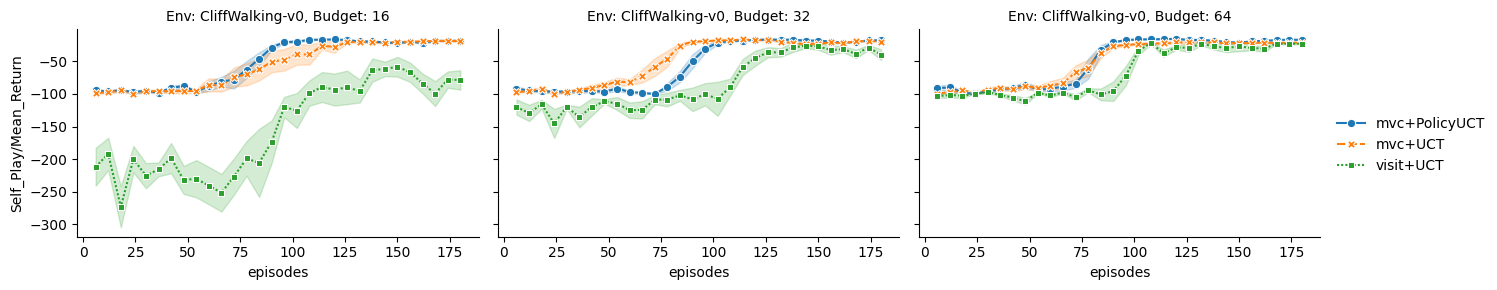

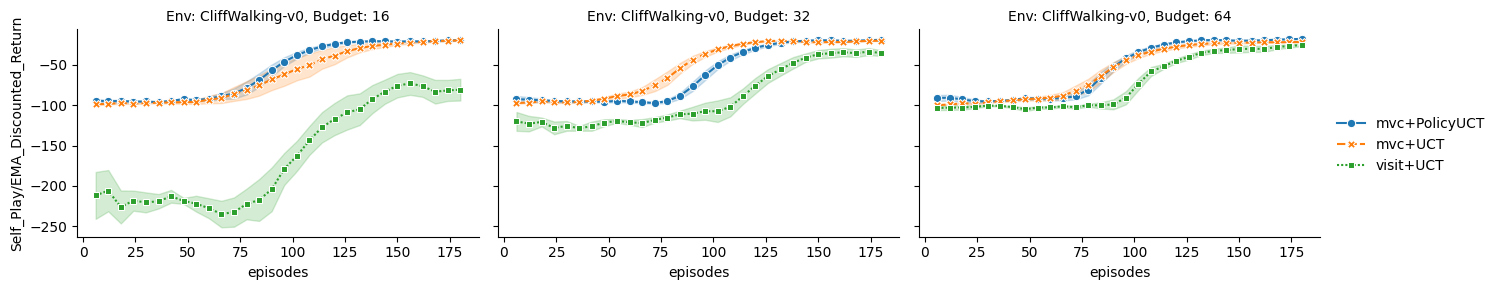

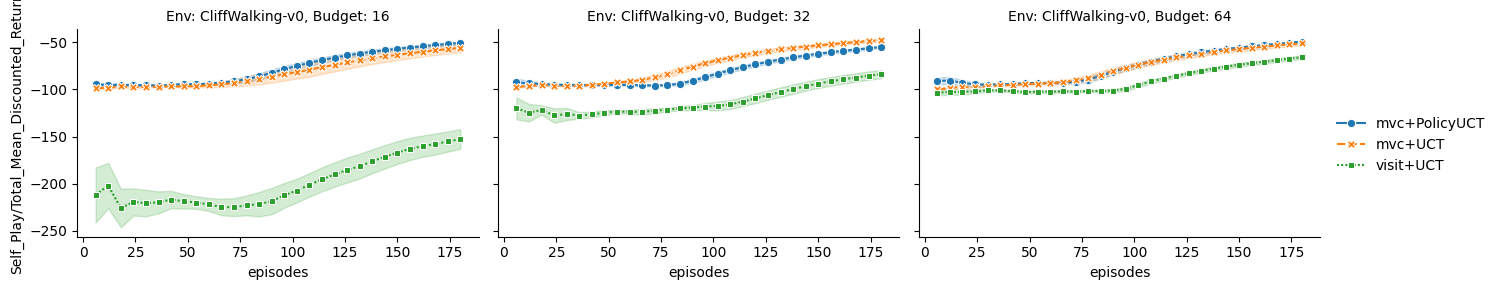

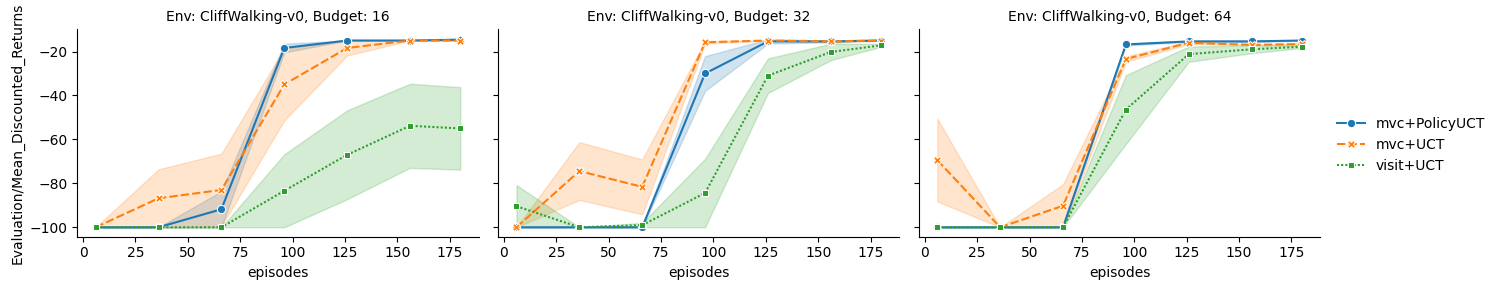

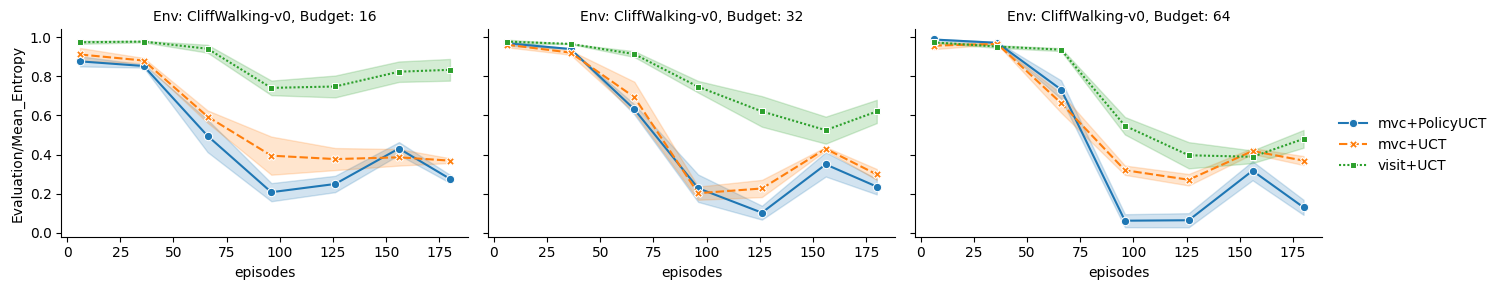

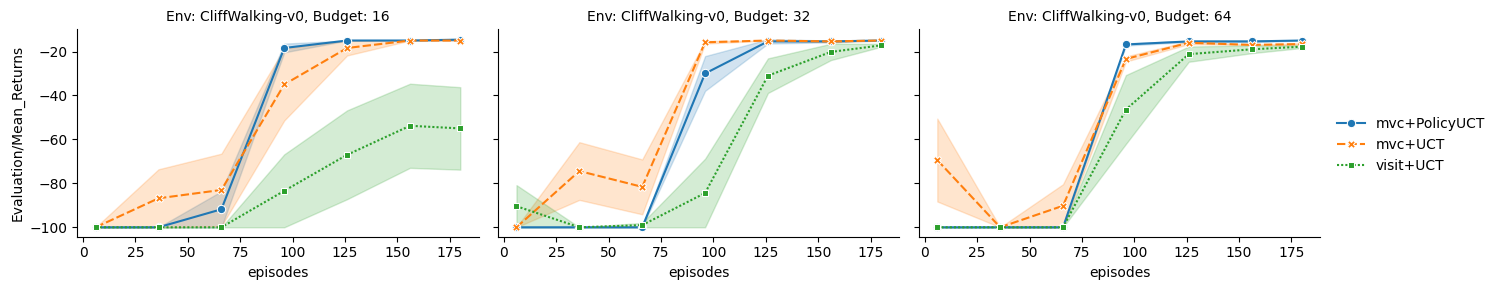

In [101]:





df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']

metrics = ['Self_Play/Mean_Discounted_Return','Self_Play/Mean_Return', 'Self_Play/EMA_Discounted_Return', 'Self_Play/Total_Mean_Discounted_Return',
           "Evaluation/Mean_Discounted_Returns", "Evaluation/Mean_Entropy", "Evaluation/Mean_Returns"]
x_metric = "episodes"

estimator = "mean"

for metric in metrics:
    # Step 1: Set up the FacetGrid to create one subplot for each unique value in 'env_description'
    # Note: adjust size and aspect to fit your data and preference
    g = sns.FacetGrid(data=df, row="env_description", col="planning_budget", sharex="col", sharey="row", aspect=1.5)

    # Step 2: Use map_dataframe to draw the lineplots on each subplot
    # Pass sns.lineplot as the plotting function and its arguments
    g.map_dataframe(sns.lineplot,
                    x=x_metric, y=metric,
                    hue="policy_combination", style="policy_combination",
                    markers=True, errorbar="se", estimator="mean")  # adjust 'estimator' as needed


    # Step 3: Adjusting aesthetics (optional)
    # Adding a legend
    g.add_legend()
    g.set_titles("Env: {row_name}, Budget: {col_name}")


    # Adjust the labels/titles as needed
    g.set_axis_labels(x_metric, metric)
    # increase the width of the plot
    # g.fig.set_figwidth(10)
    # plt.suptitle(metric)
    # plt.tight_layout()
    plt.show()

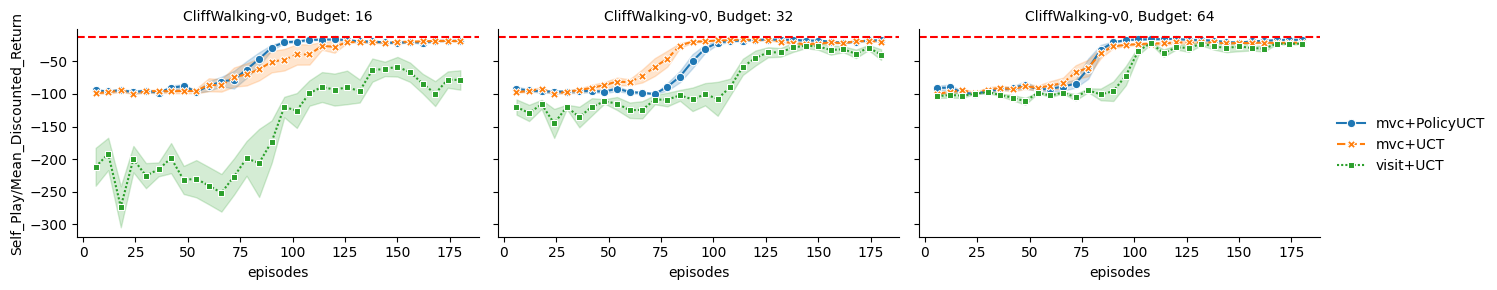

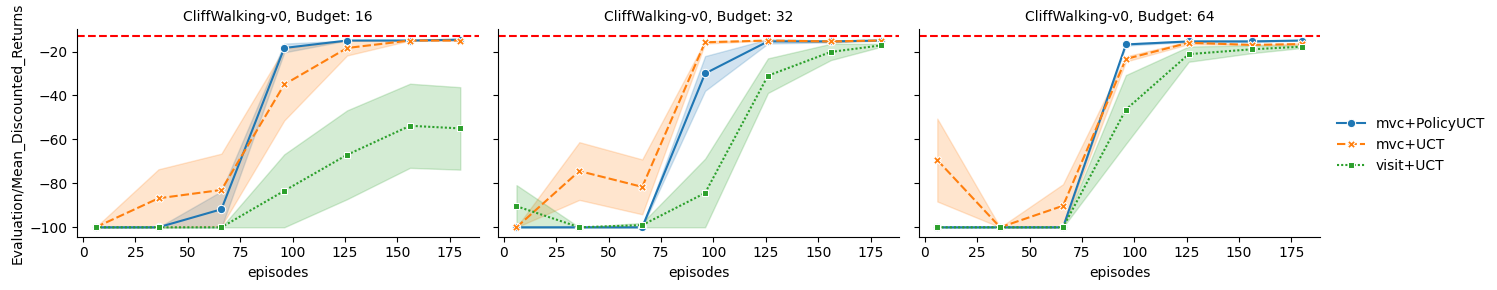

In [103]:

env_description = "CliffWalking-v0"
runs = df[df["env_description"] == env_description]
optimum_value = runs["optimal_value"][0]

metrics = ["Self_Play/Mean_Discounted_Return", "Evaluation/Mean_Discounted_Returns"]

estimator = "mean"

for metric in metrics:
    # Step 1: Set up the FacetGrid to create one subplot for each unique value in 'env_description'
    # Note: adjust size and aspect to fit your data and preference
    g = sns.FacetGrid(data=df, row="env_description", col="planning_budget", sharex="col", sharey="row", aspect=1.5)

    # Step 2: Use map_dataframe to draw the lineplots on each subplot
    # Pass sns.lineplot as the plotting function and its arguments
    g.map_dataframe(sns.lineplot,
                    x=x_metric, y=metric,
                    hue="policy_combination", style="policy_combination",
                    markers=True, errorbar="se", estimator="mean")  # adjust 'estimator' as needed

    # add a horizontal line for the optimal value to each subplot

    for ax in g.axes.flat:
        ax.axhline(optimum_value, ls="--", color="red")



    # Step 3: Adjusting aesthetics (optional)
    # Adding a legend
    g.add_legend()
    g.set_titles("{row_name}, Budget: {col_name}")


    # Adjust the labels/titles as needed
    g.set_axis_labels(x_metric, metric)
    # increase the width of the plot
    # g.fig.set_figwidth(10)
    # plt.suptitle(metric)
    # plt.tight_layout()
    plt.savefig(f'{save_folder}/{x_metric}_{name_fn(metric).replace(" ", "_")}_{env_description}_{estimator}.pdf')

    plt.show()
